In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import DBSCAN
import plotly.graph_objects as go

# Add the root project directory to the Python path
project_root = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(project_root))
from configs.path_config import EXTRACTED_DATA_DIR, OUTPUT_DIR

from src.clustering import clustering_preprocess #load_data, drop_columns_by_header_rules, remove_outliers, explain_variance, do_pca
from src.clustering import clustering_models # kmeans_clustering, gmm_clustering, kl_divergence, jeffreys_divergence, merge_clusters_by_divergence, streaming_dpgmm_clustering
from src.clustering import clustering_visualization #plot_clusters_over_time, plot_cluster_mean_and_std

C:\Users\gwd007\Documents\Exjobb


### Data loading and preprocessing


In [2]:
path = EXTRACTED_DATA_DIR / 'strain_distributions' / 'alvbrodel_04' / 'S-C_Close_Comp_20091129120000_20210611160000_strain_distribution_04.csv'
# path = OUTPUT_DIR / 'strain_distributions' / 'N-F_Mid_Comp_20091129120000_20210611160000_strain_distribution.csv'
df = clustering_preprocess.load_data(path)
# df

In [3]:
df = clustering_preprocess.drop_columns_by_header_rules(df, threshold=0)
# df

In [4]:
df_strain, df = clustering_preprocess.remove_outliers(df, threshold=7, individual_threshold=7)
# df

Total number of outliers removed: 608


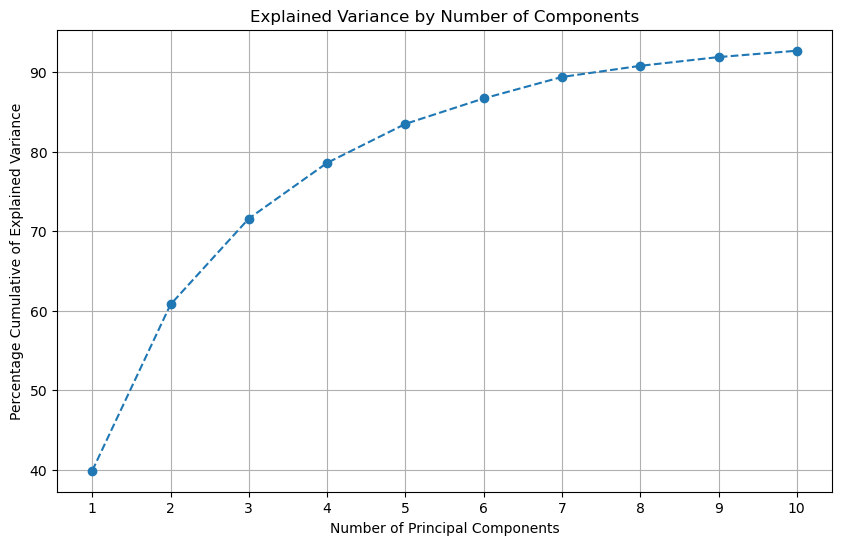

In [5]:
clustering_preprocess.explain_variance(df_strain)

In [6]:
n_components = 8
normalized_pca_components, df_pca = clustering_preprocess.do_pca(n_components, df_strain, df)

### GMM Clustering

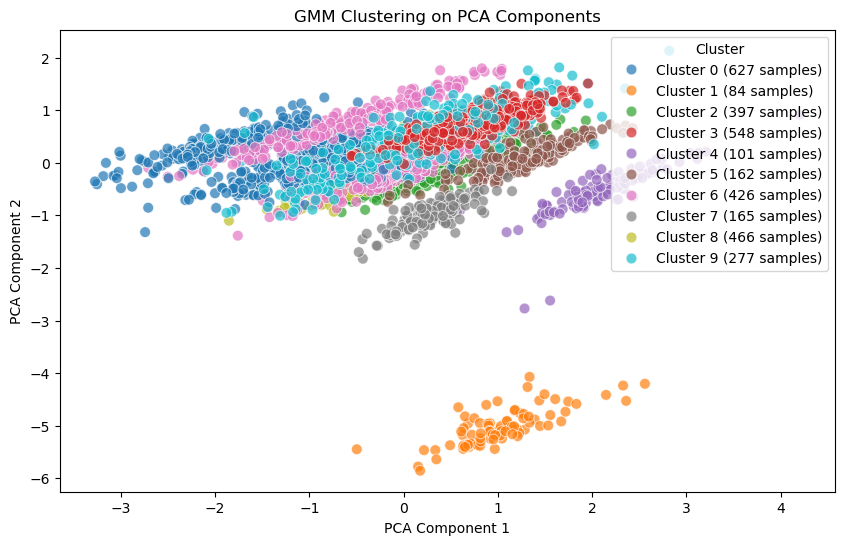

In [18]:
n_clusters = 10
data_with_gmm, cluster_color_map  = clustering_models.gmm_clustering(normalized_pca_components, df, n_clusters)
# data_with_gmm

In [35]:
clustering_visualization.plot_clusters_over_time(data_with_gmm, cluster_color_map, 'GMM')

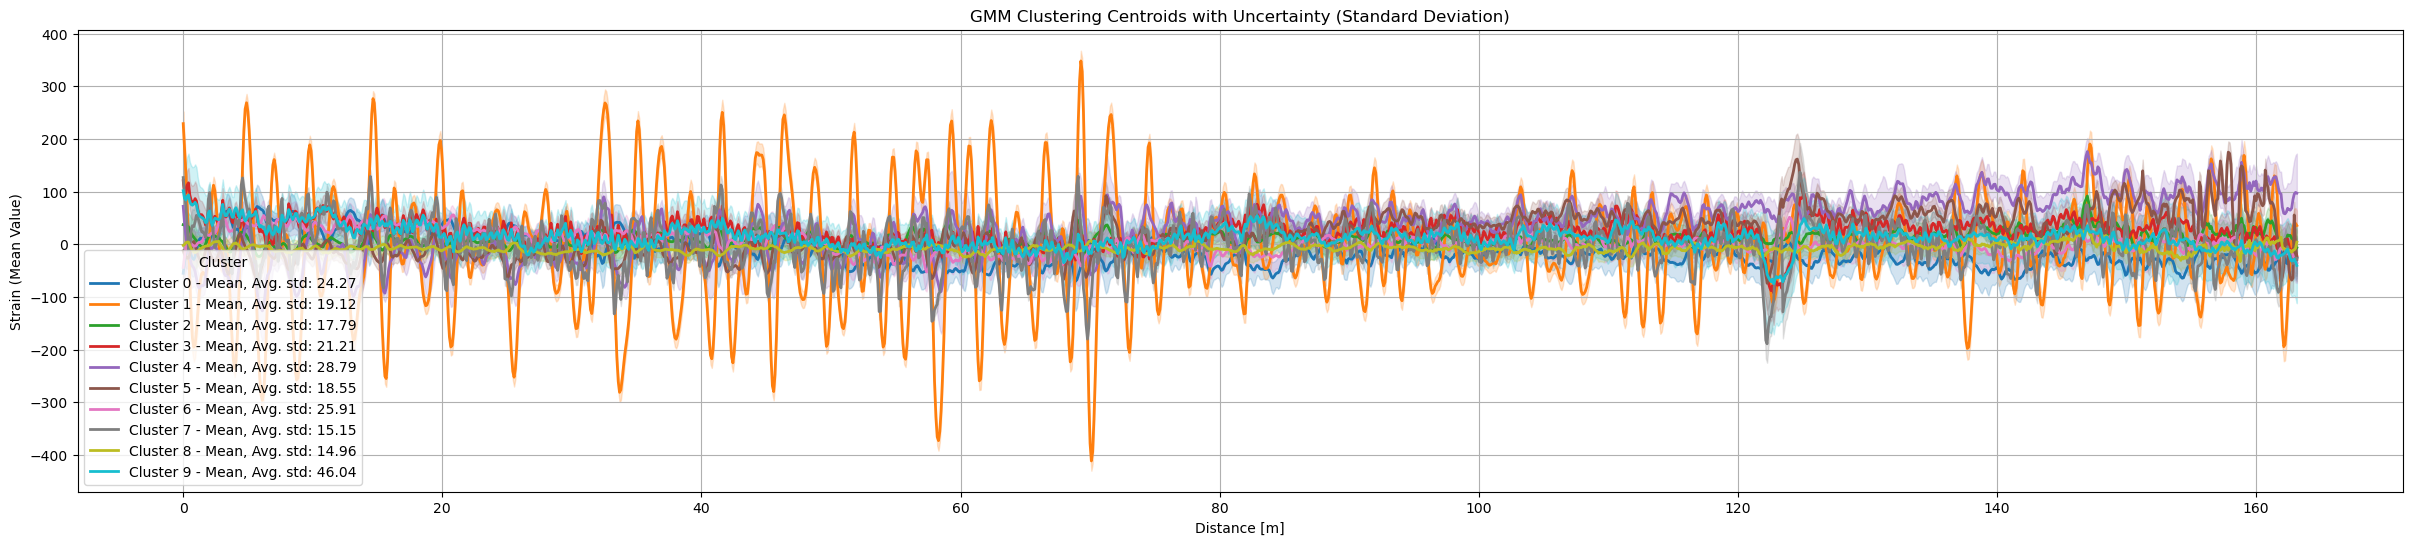

In [31]:
clusters_to_keep = ['all'] # 'all' or a list of cluster indices
clustering_visualization.plot_cluster_mean_and_std(data_with_gmm, clusters_to_keep, cluster_color_map, 'GMM')

### DPGMM Clustering

c:\Users\gwd007\AppData\Local\anaconda3\envs\exjobb\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



Initial fit => Clusters used: 1


c:\Users\gwd007\AppData\Local\anaconda3\envs\exjobb\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



Window 1095-1275 => Active clusters in window: 2, Top 5 weights: [0.002 0.001 0.002 0.001 0.001]
Window 1185-1365 => Active clusters in window: 2, Top 5 weights: [0.001 0.001 0.146 0.001 0.002]
Window 1275-1455 => Active clusters in window: 2, Top 5 weights: [0.001 0.001 0.115 0.001 0.002]
Window 1365-1545 => Active clusters in window: 2, Top 5 weights: [0.001 0.001 0.001 0.184 0.002]
Window 1455-1635 => Active clusters in window: 2, Top 5 weights: [0.051 0.001 0.001 0.001 0.001]
Window 1545-1725 => Active clusters in window: 1, Top 5 weights: [0.107 0.001 0.001 0.001 0.002]
Window 1635-1815 => Active clusters in window: 1, Top 5 weights: [0.001 0.085 0.001 0.043 0.001]
Window 1725-1905 => Active clusters in window: 1, Top 5 weights: [0.001 0.001 0.002 0.041 0.002]
Window 1815-1995 => Active clusters in window: 1, Top 5 weights: [0.039 0.004 0.001 0.042 0.   ]
Window 1905-2085 => Active clusters in window: 1, Top 5 weights: [0.    0.001 0.    0.037 0.001]
Window 1995-2175 => Active clu

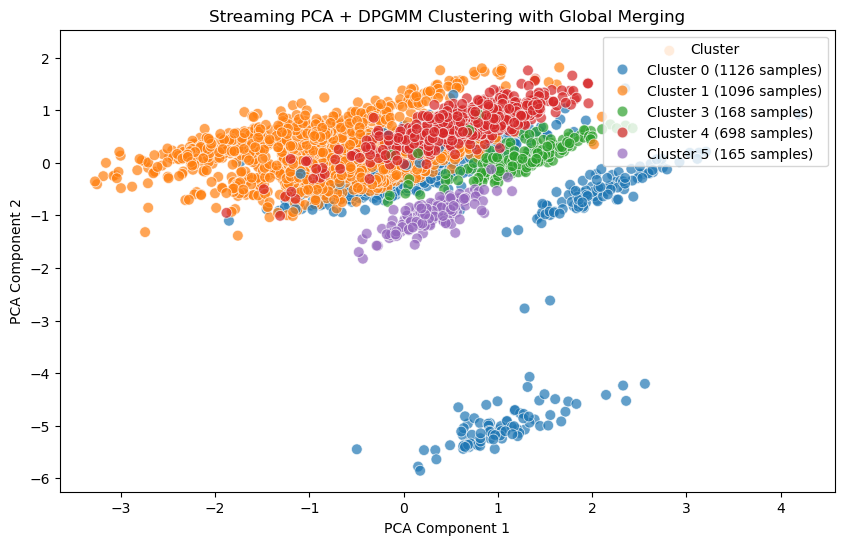

In [ ]:
data_with_dpgmm, cluster_color_map = clustering_models.streaming_dpgmm_clustering(
    normalized_pca_components=normalized_pca_components,
    df=df,
    prior=0.1,                # Decides how restrictive the model is when creating new clusters the lower the more restrictive
    n_points=1095,            # Number of points to use for the initial clustering, 3 years
    window_size=180,          # Size of the sliding window, 0,5 years
    step_size=90,             # Step size for the sliding window, 3 months
    max_components=100,       # Maximum number of components to use in the model
    merge_threshold=7,        # Threshold for merging clusters
)

In [ ]:
clustering_visualization.plot_clusters_over_time(data_with_dpgmm, cluster_color_map, 'DPGMM')

In [34]:
# df_cluster = data_with_dpgmm[data_with_dpgmm['Cluster'] == 7]
# df_cluster

In [ ]:
data_with_dpgmm.shape

Timestamp  Cluster  Assigned_Cluster_Prob    0.0  \
0    2009-11-30 04:00:00        0               0.746494  -23.0   
1    2009-12-01 04:00:00        0               0.996897   68.0   
3    2009-12-03 04:00:00        0               0.999228    2.0   
4    2009-12-04 04:00:00        0               0.995354  -36.0   
5    2009-12-05 04:00:00        0               0.758623  -23.0   
...                  ...      ...                    ...    ...   
3849 2021-05-28 04:00:00        4               0.962287  141.0   
3853 2021-06-04 04:00:00        4               0.992259  187.0   
3858 2021-06-09 04:00:00        4               0.973847  176.0   
3859 2021-06-10 04:00:00        4               0.905428  151.0   
3860 2021-06-11 04:00:00        4               0.645043  152.0   

      0.09999999999999998  0.20999999999999996  0.30999999999999994  \
0                   -26.0                -25.0                -25.0   
1                    70.0                 69.0                 68.0   
3                     3.0                  8.0                 10.0   
4                   -38.0                -34.0                -34.0   
5                   -25.0                -23.0                -22.0   
...                   ...                  ...                  ...   
3849                111.0                116.0                137.0   
3853                146.0                140.0                150.0   
3858                137.0                136.0                154.0   
3859                112.0                111.0                129.0   
3860                116.0                117.0                137.0   

      0.4099999999999999   0.51  0.6099999999999999  ...  162.24  \
0                  -23.0  -26.0               -29.0  ...    -9.0   
1                   67.0   66.0                65.0  ...     0.0   
3                   13.0   16.0                20.0  ...    -9.0   
4                  -31.0  -35.0               -38.0  ...    -9.0   
5                  -21.0  -25.0               -27.0  ...     2.0   
...                  ...    ...                 ...  ...     ...   
3849               141.0  102.0                89.0  ...   -84.0   
3853               143.0  120.0               123.0  ...   -82.0   
3858               156.0  119.0               108.0  ...   -44.0   
3859               131.0   95.0                87.0  ...   -51.0   
3860               141.0  104.0                94.0  ...   -37.0   

      162.34000000000003  162.44000000000003  162.54000000000002  \
0                  -15.0                -9.0                -9.0   
1                   -9.0                -7.0                -2.0   
3                   -9.0                -9.0               -14.0   
4                  -15.0               -12.0                -9.0   
5                    3.0                 9.0                 6.0   
...                  ...                 ...                 ...   
3849               -86.0               -77.0               -77.0   
3853               -74.0               -84.0              -110.0   
3858               -55.0               -51.0               -57.0   
3859               -49.0               -50.0               -64.0   
3860               -42.0               -38.0               -44.0   

      162.64000000000001  162.75  162.85000000000002  162.95000000000002  \
0                  -12.0   -17.0               -13.0               -14.0   
1                    0.0    -4.0                -6.0                -7.0   
3                   -5.0    -6.0                -5.0                 0.0   
4                  -17.0   -14.0               -13.0               -13.0   
5                   14.0     9.0                10.0                 5.0   
...                  ...     ...                 ...                 ...   
3849               -80.0   -87.0               -87.0               -82.0   
3853              -129.0  -128.0              -118.0              -119.0   
3858               -70.0   -90.0       

In [14]:
new_data_with_dpgmm = data_with_dpgmm[data_with_dpgmm['Assigned_Cluster_Prob'] > 1e-2]
new_data_with_dpgmm.shape 

(3253, 1608)

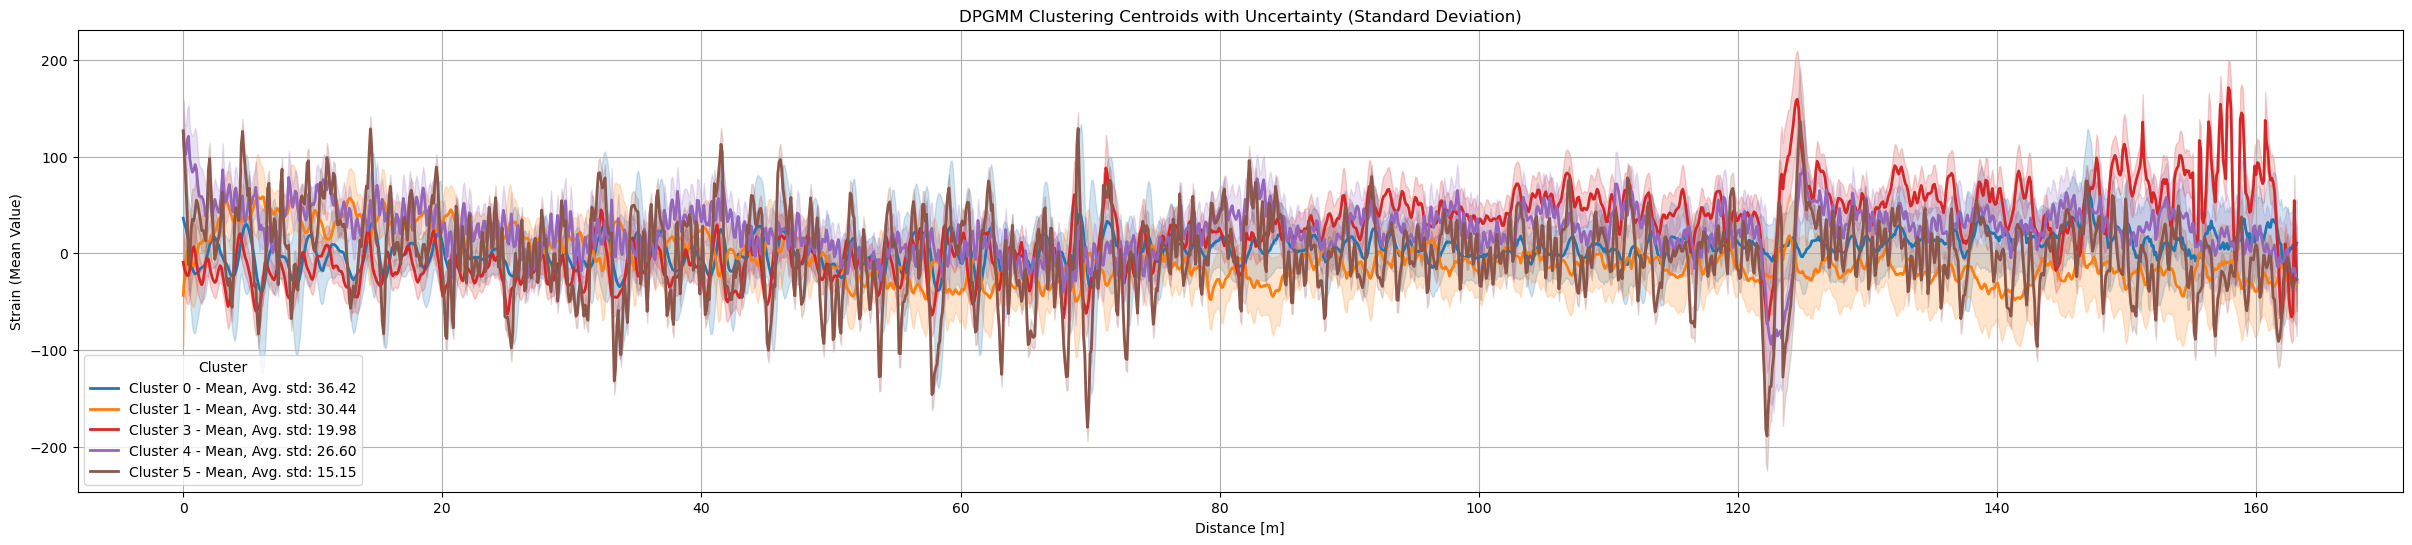

In [32]:
clusters_to_keep = ['all'] # 'all' or a list of cluster indices
clustering_visualization.plot_cluster_mean_and_std(data_with_dpgmm, clusters_to_keep, cluster_color_map, 'DPGMM')